In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend as K
from keras.datasets import cifar10
from keras.applications import resnet50
import numpy as np

from utils import display_image
from Generator import Generator
from ProjectedGradientDescent import ProjectedGradientDescent

Using TensorFlow backend.


In [2]:
def preprocess(image, norm=False):
    image = tf.cast(image, tf.float32)
    if norm:
        image = image /255
    image = tf.image.resize(image, (224, 224))
    image = image[None, ...]
    return image

In [3]:
pretrained_model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')
pretrained_model.trainable = False

image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)

Predicted: [('n02099712', 'Labrador_retriever', 0.2636583), ('n02108089', 'boxer', 0.14727299), ('n02099849', 'Chesapeake_Bay_retriever', 0.10796826)]


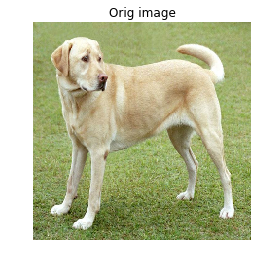

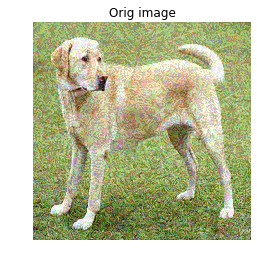

Predicted: [('n03598930', 'jigsaw_puzzle', 0.087992065), ('n04286575', 'spotlight', 0.04196816), ('n03759954', 'microphone', 0.041108113)]


In [4]:
preds = pretrained_model.predict(image)
print('Predicted:', resnet50.decode_predictions(preds, top=3)[0])

target_class = 3
n_classes = 1000
prob = tf.one_hot([target_class], n_classes)

pgd = ProjectedGradientDescent(pretrained_model, image, prob)
adv_image = pgd.gen_adv_example(showImage=True)

preds = pretrained_model.predict(adv_image)
print('Predicted:', resnet50.decode_predictions(preds, top=3)[0])

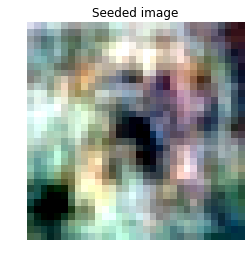

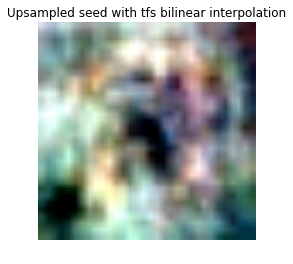

In [5]:
generator = Generator()
generator.calc_class_stats()

seed = generator.generate_seed(5)
seed_image = preprocess(seed)
display_image(seed, "Seeded image")
display_image(seed_image, "Upsampled seed with tfs bilinear interpolation")

Predicted: [('n03720891', 'maraca', 0.25961298), ('n04286575', 'spotlight', 0.09263276), ('n02783161', 'ballpoint', 0.07146544)]


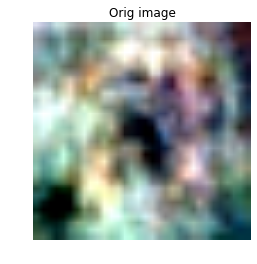

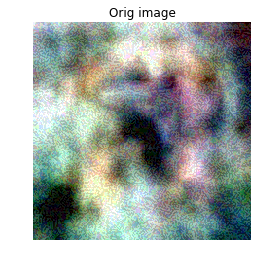

Predicted: [('n02107312', 'miniature_pinscher', 0.13470429), ('n02093754', 'Border_terrier', 0.0682737), ('n02099849', 'Chesapeake_Bay_retriever', 0.04601582)]


In [6]:
preds = pretrained_model.predict(seed_image)
print('Predicted:', resnet50.decode_predictions(preds, top=3)[0])

target_class = 5
n_classes = 1000
prob = tf.one_hot([target_class], n_classes)
pgd = ProjectedGradientDescent(pretrained_model, seed_image, prob)
adv_seed = pgd.gen_adv_example(showImage=True)

preds = pretrained_model.predict(adv_seed)
print('Predicted:', resnet50.decode_predictions(preds, top=3)[0])

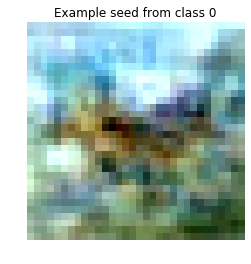

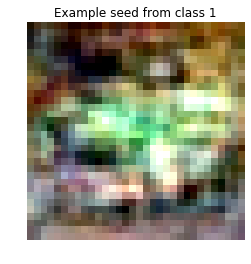

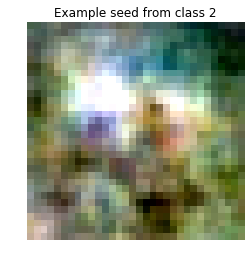

In [7]:
generator.visualize_example_seeds()